In [1]:
from numpy import load

from astropy.table import Table

from matplotlib import pyplot as plt

with open('noiseless_headers.txt', 'r') as filehandle:
    headers = [current_place.rstrip() for current_place in filehandle.readlines()]

data=load('mil1.npy')
cat=Table(data, names=headers)

cat

redshift,mass,beta1,beta2,beta3,beta4,f_burt,t_burst,gamma1,gamma_2,dust1,dust2,dust_index,CFHT_u,CFHT_ustar,HSC_g,HSC_r,HSC_i,HSC_z,HSC_y,SC_IB427,SC_IB464,SC_IA484,SC_IB505,SC_IA527,SC_IB574,SC_IA624,SC_IA679,SC_IB709,SC_IA738,SC_IA767,SC_IB827,UVISTA_Y,UVISTA_J,UVISTA_H,UVISTA_Ks,IRAC_CH1,IRAC_CH2,IRAC_CH3,IRAC_CH4
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
3.1015155851850844,11.166648135175215,0.7662172963336349,0.05278418344129675,0.10709747143106133,0.07390104879400705,0.8330273385918114,0.4335097616127685,0.0019614659610897697,0.002443492142410467,1.201651136933307,1.2108180115302747,-0.24159298313579392,9.575657025235642e-06,1.1267300263566703e-05,0.0003869598710927747,0.003526719432054907,0.00833537146983484,0.010267189219561391,0.015599827017473906,7.326172951824731e-05,0.00022743458356497465,0.00025770460484711514,0.00036146782023747123,0.0008613003436382404,0.0023056543025575475,0.0034898635479005576,0.005214209323729175,0.0063556240735032875,0.00771474287889727,0.0084036087906638,0.009805549299501523,0.019910704675872047,0.0571325796409495,0.308877765890693,0.6920307201009512,1.5925263360683848,2.0316943300484205,2.301222566038927,2.3490105321873047
4.308215631474846,8.245129367125104,0.9393088977147372,0.05800212746442092,0.0009997387781592551,0.0016892360426825788,0.3110601755198382,6.128628846602057,8.404844618168422e-05,0.0142247309225163,1.2797402473541721,0.9896370768158088,0.28738332864985505,1.1515705988047588e-07,4.280535818367833e-08,1.3510102373771489e-05,7.612104216702105e-05,0.00011874693474009525,0.00012853188685439554,0.0001333265326405284,1.3953843407802955e-07,3.328431547350431e-07,8.712623299303154e-06,2.273895720740791e-05,3.7350844468045885e-05,7.413047778944697e-05,7.553903837556695e-05,9.888715409169018e-05,0.00010983665005947429,0.00011657596084116732,0.00012122345798097819,0.00012170042385929985,0.00013426731502307938,0.0001437548632636078,0.0001863629153320101,0.00040643803694055306,0.0006034550339252999,0.0007180936926013312,0.0008270940860478171,0.0009014059135980236
0.15281158130497619,8.260328187660658,0.871698959834124,0.09250451190007693,0.0050783490251935385,0.030718179240605492,0.9153843319823217,1.467342007803197,0.00042936846727163595,0.0006476428165332738,0.218911268456202,1.7074526796198122,-1.3621424895143215,0.0005865065500900995,0.0006353787502867308,0.017310709925548808,0.1019121851448214,0.2541185095137859,0.41080086520044584,0.505594714114814,0.002469247453345189,0.01016732276728715,0.016811222894081636,0.024005835206814347,0.03499171420275347,0.06403545042190939,0.10174479216559248,0.15614395720156776,0.18651113437542835,0.2161182669077133,0.24909162941674598,0.322709167139708,0.5506254175399953,0.7286965852608418,0.8768017650231699,0.8348910874336402,0.5146580207664256,0.33133861653428337,0.2667949049232839,1.5446980629483529
5.042517766022031,12.355730990968178,0.9184871391450672,0.06720003610389108,0.014261846636061785,5.097811497994905e-05,0.9360759675930951,6.655371732208047,0.0004396224460088721,0.004048461573274384,1.5860327417196187,0.12710550693613576,-0.6347238044364247,6.0406174724906016e-06,3.93484399186909e-06,0.000226975418276336,0.08767999962136763,0.19644878153991938,0.2823524012292762,0.30161863085443524,2.57206096538677e-05,8.313052902961097e-05,0.0001411212863076647,0.00026335132076581494,0.00039963133353189395,0.035686402741348155,0.08774445945373159,0.1491348795650894,0.15435962593012784,0.12596148616573616,0.21106443925390547,0.25583985232152967,0.31707158196637963,0.3502393208332415,0.44909820064665085,0.6226268913984878,1.4834715931678881,1.624504037907912,1.7512677201985225,1.7376100352326034
1.8746283159140382,11.087091986749154,0.9126858531625406,0.08312902465168306,0.0019

In [2]:
from astropy import table
from astropy.io import fits,ascii,votable
from astropy import units as u 
from astropy import constants as const
from astropy import table
from astropy.cosmology import Planck15,FlatLambdaCDM
import numpy as np
cat0 = table.Table.read('COSMOS2020.fits',format='fits',hdu=1)

cat0

def mag(flux):
    x=-2.5*np.log10(flux) + 23.9 
    return x 



In [5]:
keys=cat0.keys()
filters=[]
for key in keys:
    if key[len(key)-4:]=='FLUX':
        
        filters+=[key[:len(key)-5]]
        


In [6]:
cat = table.Table.read('mil1_noisy_gal.fits',format='fits',hdu=1)
cat

redshift,mass,beta1,beta2,beta3,beta4,f_burt,t_burst,gamma1,gamma_2,dust1,dust2,dust_index,CFHT_u_FLUX,CFHT_u_FLUXERR,CFHT_u_BETA_FLUX,CFHT_u_BETA_FLUXERR,CFHT_ustar_FLUX,CFHT_ustar_FLUXERR,CFHT_ustar_BETA_FLUX,CFHT_ustar_BETA_FLUXERR,HSC_g_FLUX,HSC_g_FLUXERR,HSC_g_BETA_FLUX,HSC_g_BETA_FLUXERR,HSC_r_FLUX,HSC_r_FLUXERR,HSC_r_BETA_FLUX,HSC_r_BETA_FLUXERR,HSC_i_FLUX,HSC_i_FLUXERR,HSC_i_BETA_FLUX,HSC_i_BETA_FLUXERR,HSC_z_FLUX,HSC_z_FLUXERR,HSC_z_BETA_FLUX,HSC_z_BETA_FLUXERR,HSC_y_FLUX,HSC_y_FLUXERR,HSC_y_BETA_FLUX,HSC_y_BETA_FLUXERR,UVISTA_Y_FLUX,UVISTA_Y_FLUXERR,UVISTA_Y_BETA_FLUX,UVISTA_Y_BETA_FLUXERR,UVISTA_J_FLUX,UVISTA_J_FLUXERR,UVISTA_J_BETA_FLUX,UVISTA_J_BETA_FLUXERR,UVISTA_H_FLUX,UVISTA_H_FLUXERR,UVISTA_H_BETA_FLUX,UVISTA_H_BETA_FLUXERR,UVISTA_Ks_FLUX,UVISTA_Ks_FLUXERR,UVISTA_Ks_BETA_FLUX,UVISTA_Ks_BETA_FLUXERR,SC_IB427_FLUX,SC_IB427_FLUXERR,SC_IB427_BETA_FLUX,SC_IB427_BETA_FLUXERR,SC_IB464_FLUX,SC_IB464_FLUXERR,SC_IB464_BETA_FLUX,SC_IB464_BETA_FLUXERR,SC_IA484_FLUX,SC_IA484_FLUXERR,SC_IA484_BETA_FLUX,SC_IA484_BETA_FLUXERR,SC_IB505_FLUX,SC_IB505_FLUXERR,SC_IB505_BETA_FLUX,SC_IB505_BETA_FLUXERR,SC_IA527_FLUX,SC_IA527_FLUXERR,SC_IA527_BETA_FLUX,SC_IA527_BETA_FLUXERR,SC_IB574_FLUX,SC_IB574_FLUXERR,SC_IB574_BETA_FLUX,SC_IB574_BETA_FLUXERR,SC_IA624_FLUX,SC_IA624_FLUXERR,SC_IA624_BETA_FLUX,SC_IA624_BETA_FLUXERR,SC_IA679_FLUX,SC_IA679_FLUXERR,SC_IA679_BETA_FLUX,SC_IA679_BETA_FLUXERR,SC_IB709_FLUX,SC_IB709_FLUXERR,SC_IB709_BETA_FLUX,SC_IB709_BETA_FLUXERR,SC_IA738_FLUX,SC_IA738_FLUXERR,SC_IA738_BETA_FLUX,SC_IA738_BETA_FLUXERR,SC_IA767_FLUX,SC_IA767_FLUXERR,SC_IA767_BETA_FLUX,SC_IA767_BETA_FLUXERR,SC_IB827_FLUX,SC_IB827_FLUXERR,SC_IB827_BETA_FLUX,SC_IB827_BETA_FLUXERR,IRAC_CH1_FLUX,IRAC_CH1_FLUXERR,IRAC_CH1_BETA_FLUX,IRAC_CH1_BETA_FLUXERR,IRAC_CH2_FLUX,IRAC_CH2_FLUXERR,IRAC_CH2_BETA_FLUX,IRAC_CH2_BETA_FLUXERR,IRAC_CH3_FLUX,IRAC_CH3_FLUXERR,IRAC_CH3_BETA_FLUX,IRAC_CH3_BETA_FLUXERR,IRAC_CH4_FLUX,IRAC_CH4_FLUXERR,IRAC_CH4_BETA_FLUX,IRAC_CH4_BETA_FLUXERR
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
3.1015155851850844,11.166648135175215,0.7662172963336349,0.05278418344129675,0.10709747143106133,0.07390104879400705,0.8330273385918114,0.4335097616127685,0.0019614659610897697,0.002443492142410467,1.201651136933307,1.2108180115302747,-0.24159298313579392,0.0027560967052699527,0.004428510552956836,-0.0021763830746141222,0.005098464256118266,0.00016784368897882008,0.006618967398368175,0.0016231921885701368,0.0032196297638322127,-0.0015240302266962516,0.0032890809425900796,0.0004857102170266781,0.002853664577846983,0.016101032852768607,0.004137217609099485,0.006200119168881075,0.0042354122641124325,0.02379431593925145,0.0043674677002555045,0.033047191271713815,0.004856149560378266,0.030079682141520774,0.006712141387092694,0.03805807655489337,0.00720897147924274,0.040468103280618034,0.01458925682543105,0.04846859320418546,0.014469068237441114,0.06553947402091392,0.013934355305834763,0.07022551151211219,0.0030900415074161924,0.22681572282457146,0.02534012705564049,0.2100913784252611,0.020749784309524455,1.0965402843470127,0.04157108903652740

/tmp/ipykernel_4751/1316600884.py:13: RuntimeWarning: invalid value encountered in log10
  x=-2.5*np.log10(flux) + 23.9


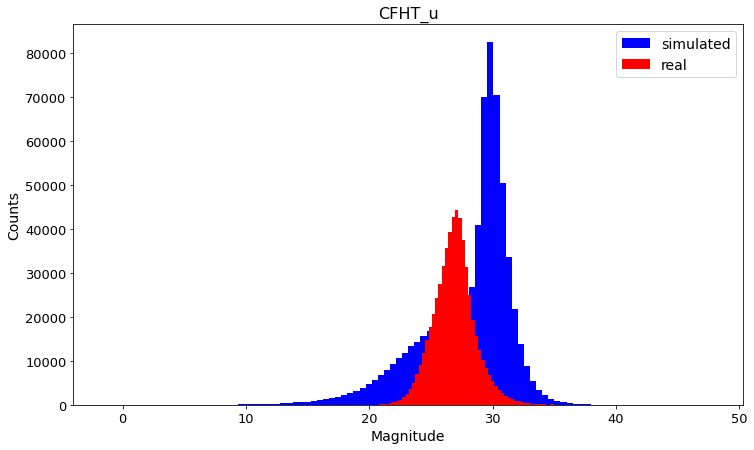

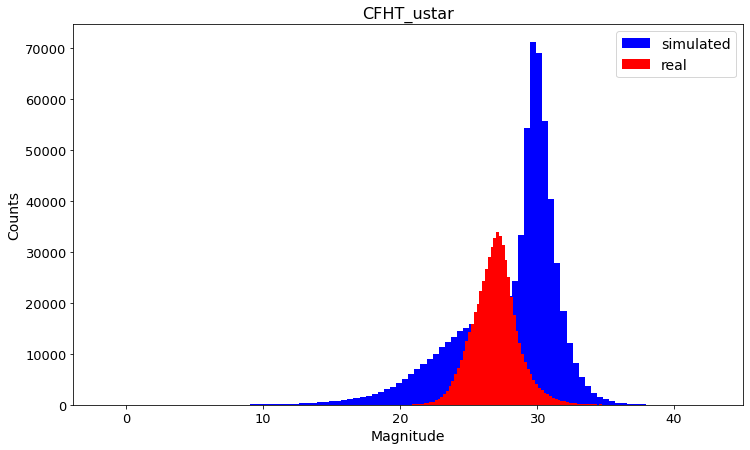

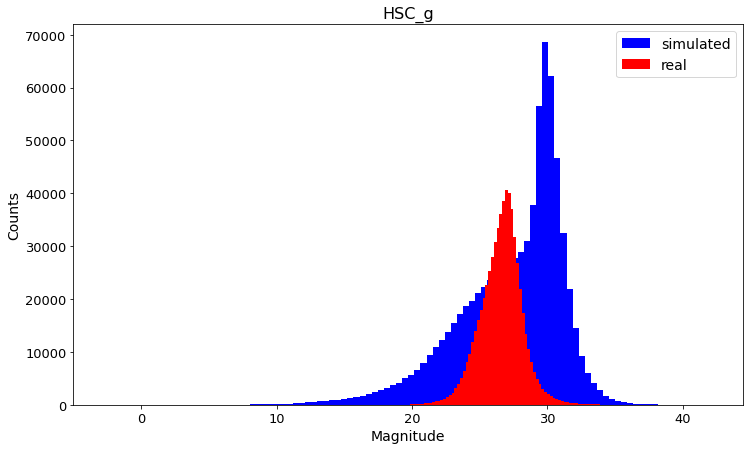

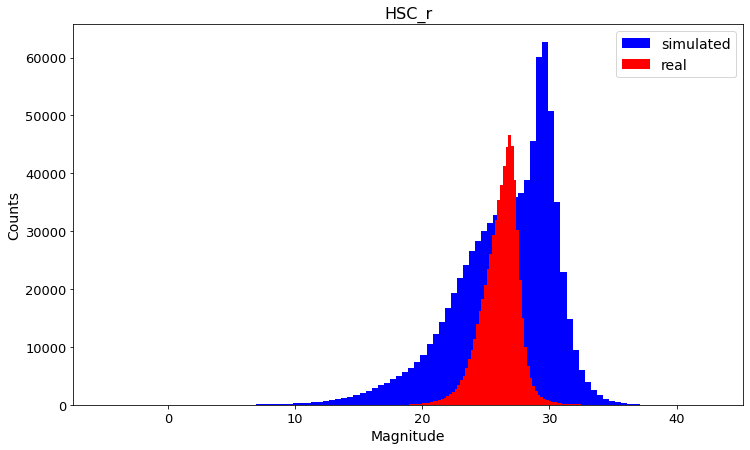

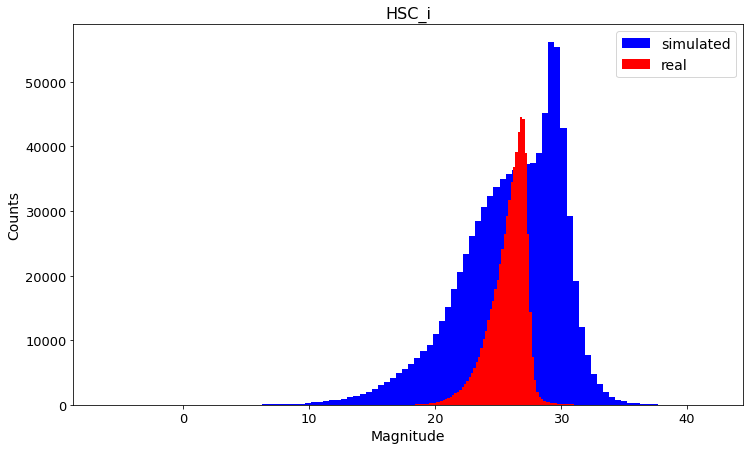

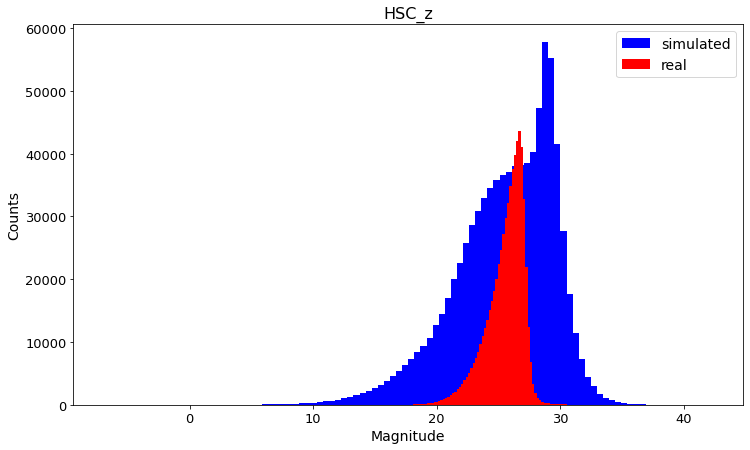

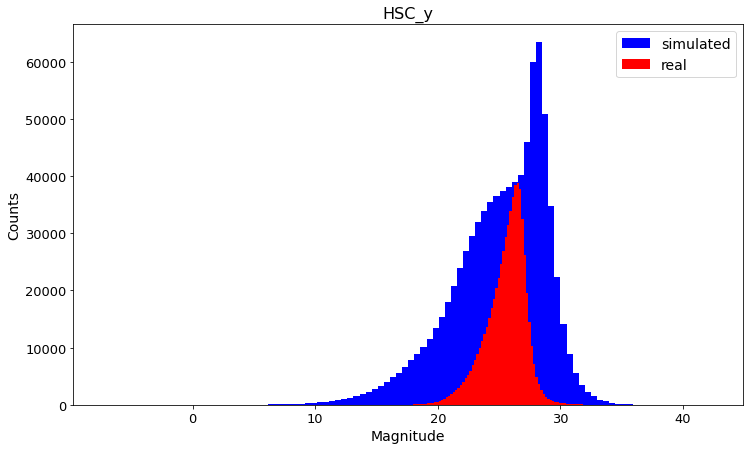

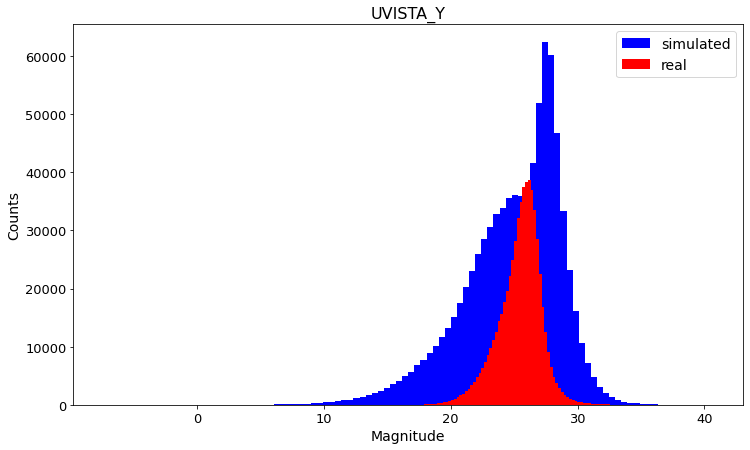

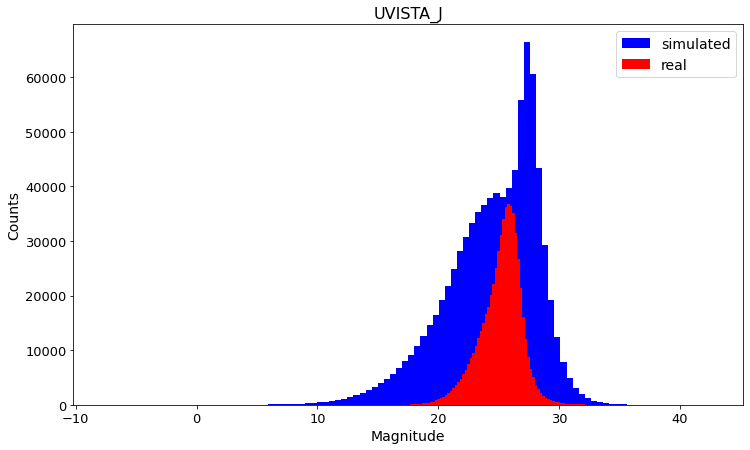

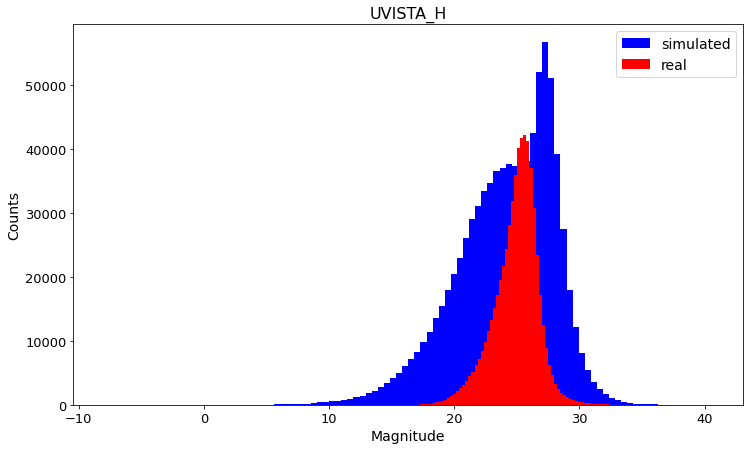

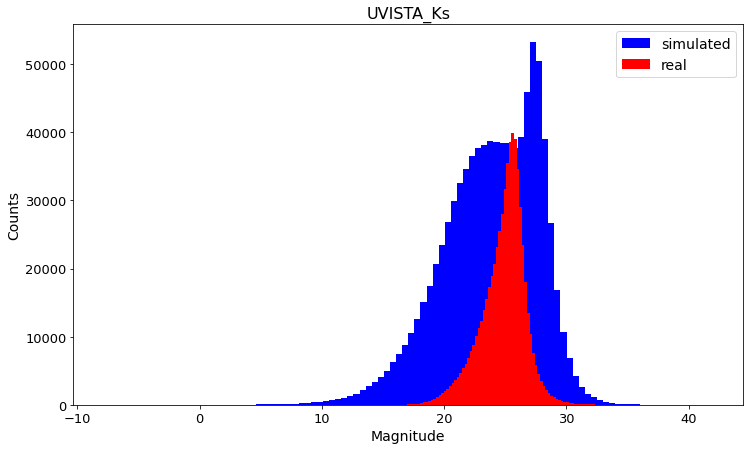

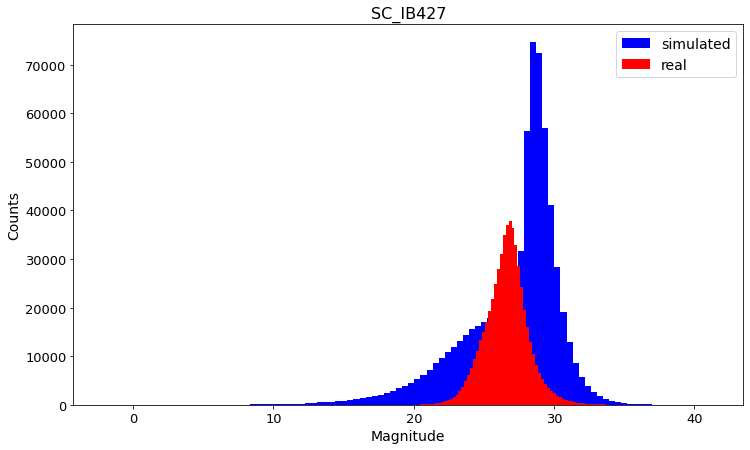

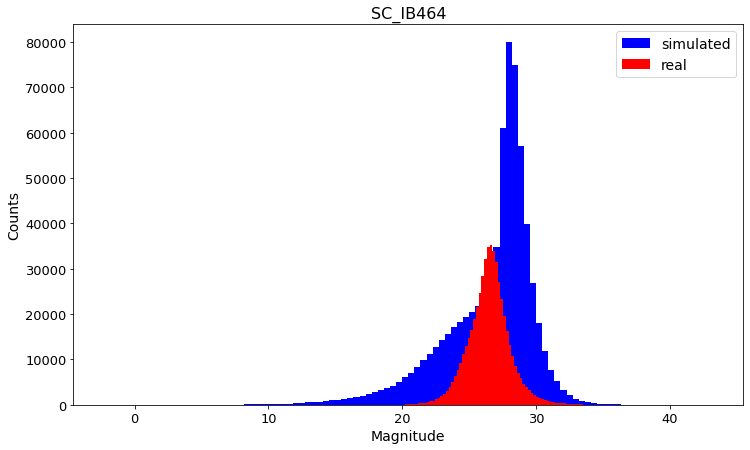

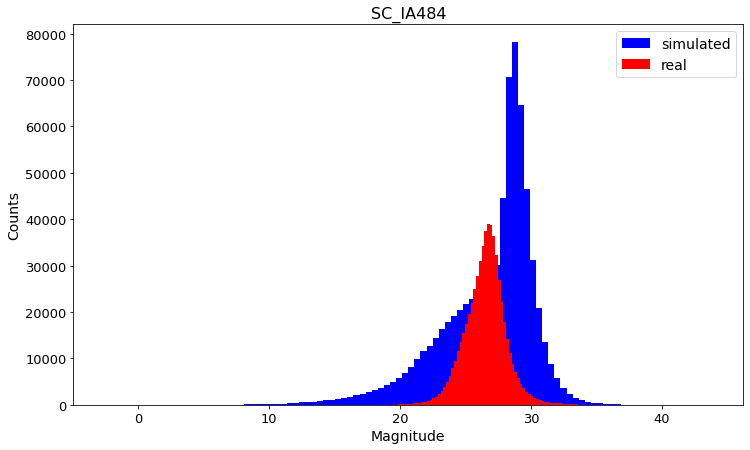

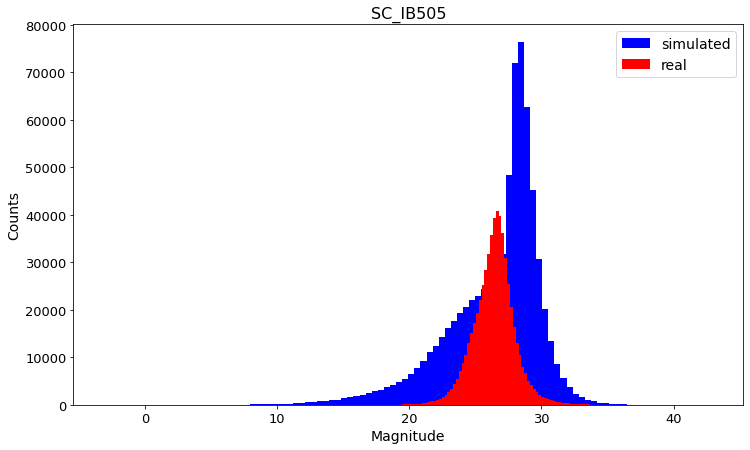

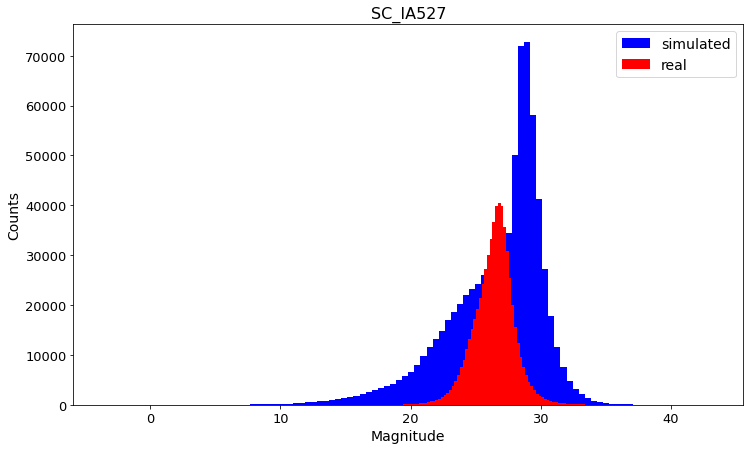

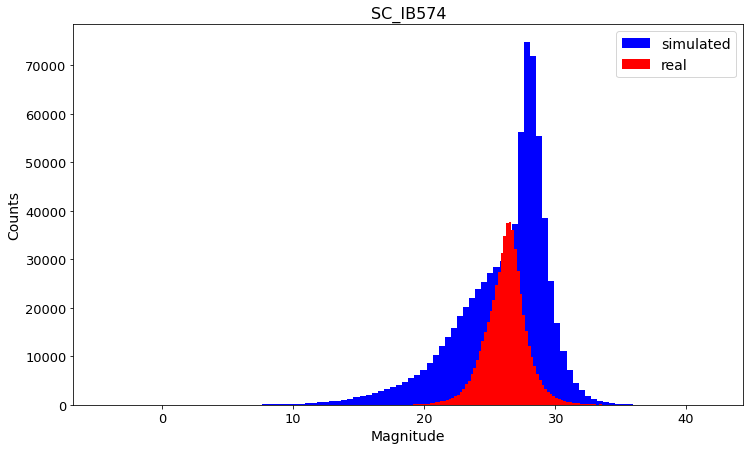

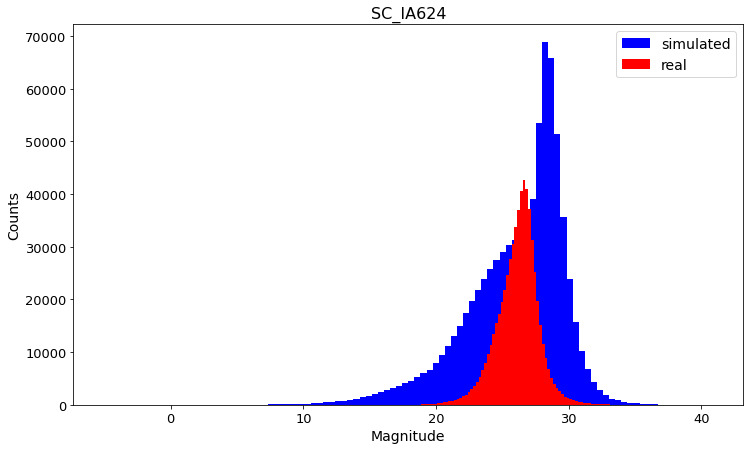

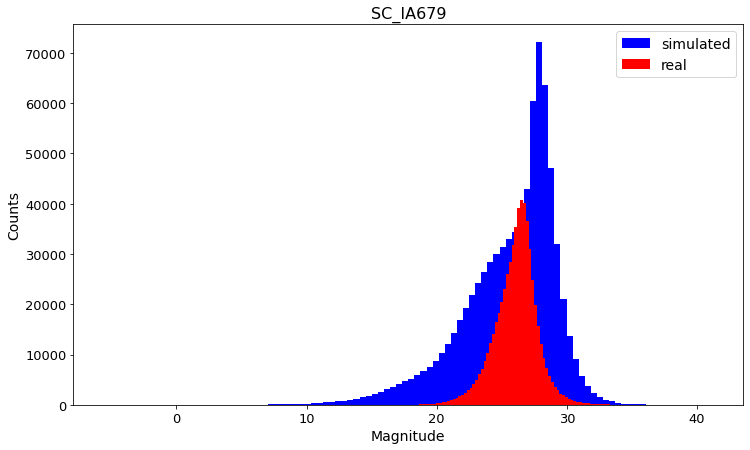

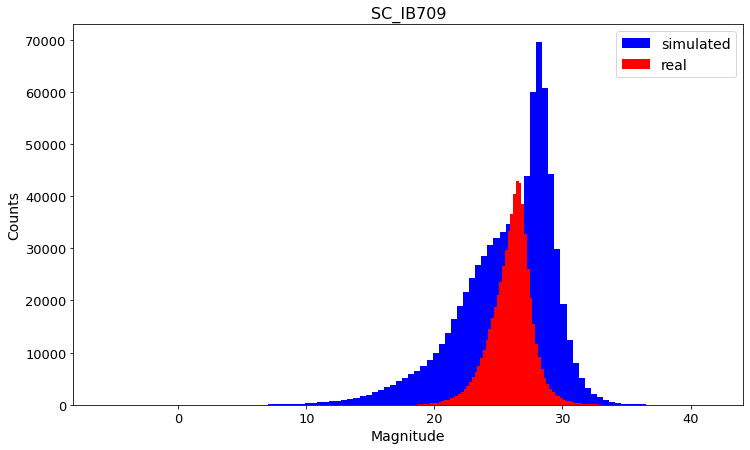

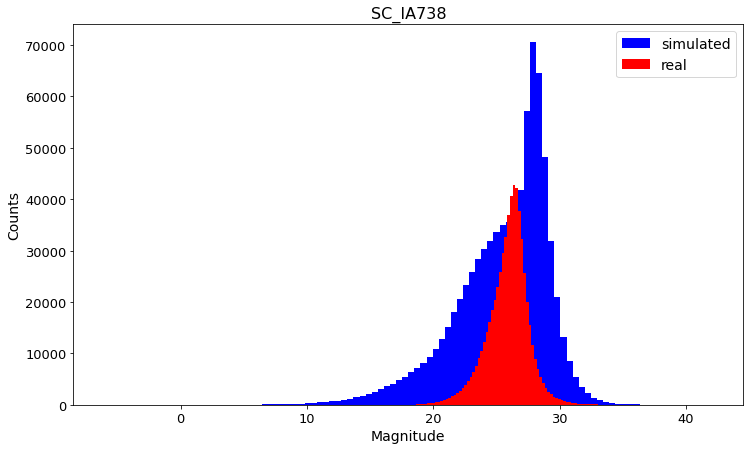

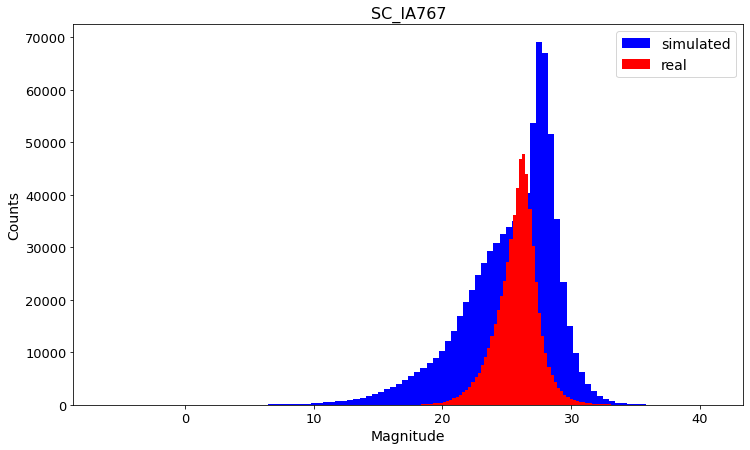

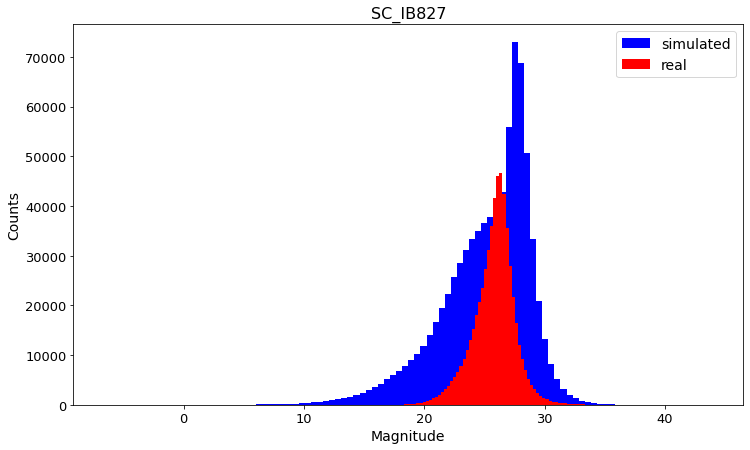

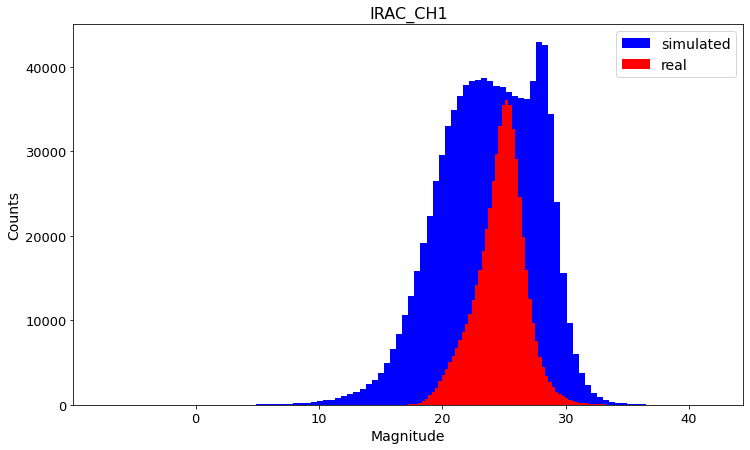

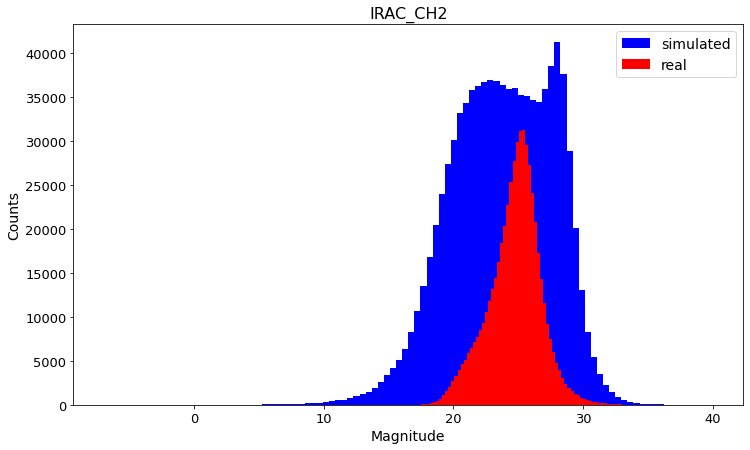

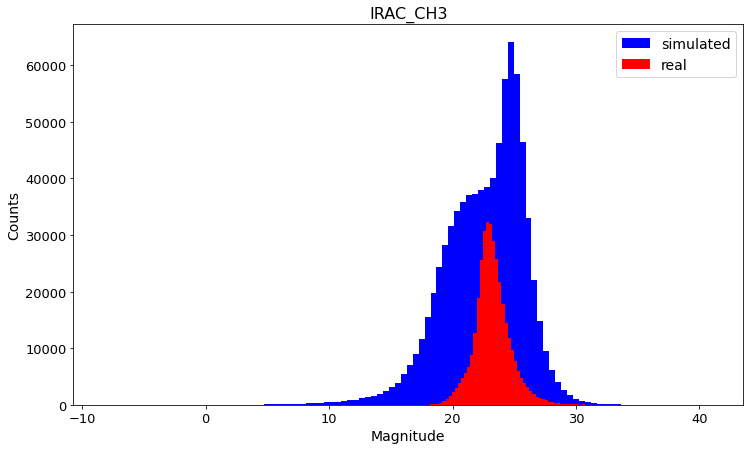

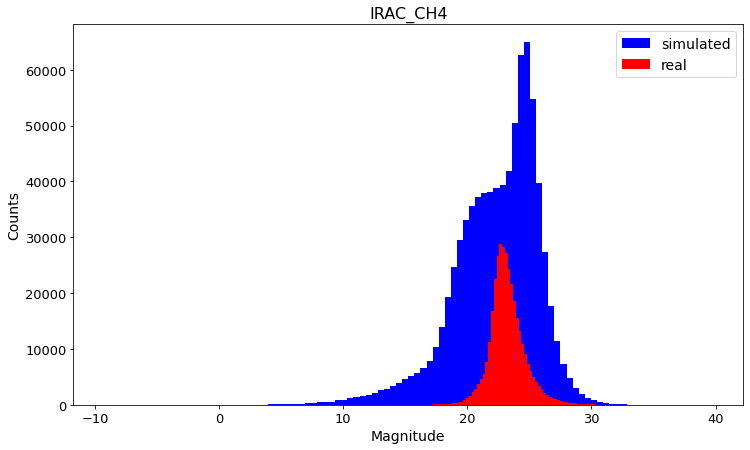

In [7]:
import numpy as np


for filt in filters:

    plt.figure(figsize=(12,7))
    plt.title(filt,fontsize=16)
    plt.hist(mag(cat[filt+'_FLUX']),bins=100,label='simulated',color='blue')
    plt.hist(mag(cat0[filt+'_FLUX']),bins=100,label='real',color='red')
    plt.legend(fontsize=14)
    plt.xlabel('Magnitude',fontsize=14)
    plt.ylabel('Counts',fontsize=14)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()
    
   

In [ ]:
import copy
                      
def calc_flux(mag):

    f=10**((mag-23.9)/-2.5)
    return f 

def get_err_bins(x,y,bins):
    

    xmagbins=np.linspace(0,45,bins+1)
    xbins=calc_flux(xmagbins)
    medarray=np.array([])
    sigarray=np.array([])
    medall=np.median(y)
    yorg=np.sort(y)
    upsigall=yorg[int(0.841*np.size(yorg))-1]
    downsigall=yorg[int(0.159*np.size(yorg))-1]
    sigall=upsigall-medall
    for i in range(bins):
         
    
        y_=y[np.logical_and(x<xbins[i],x>xbins[i+1])]
        if np.size(y_)>10:
            med=np.median(y_)
            no=np.size(y_)
            yorg=np.sort(y_)
            upsig=yorg[int(0.841*np.size(yorg))-1]
            downsig=yorg[int(0.159*np.size(yorg))-1]
            sig=(upsig-downsig)*0.5
            medarray=np.append(medarray,med)
            sigarray=np.append(sigarray,sig)
        elif i==0:
            medarray=np.append(medarray,0)
            sigarray=np.append(sigarray,0)            
        else:
            medarray=np.append(medarray,medarray[-1])
            sigarray=np.append(sigarray,sigarray[-1])
            
    
   
    
    sigarray[medarray==0]=sigarray[medarray!=0][0]
    medarray[medarray==0]=medarray[medarray!=0][0]
    


    return xbins,medarray,sigarray


def mag_err(flux_err,flux):
    
    return 1.09*flux_err/flux 



def fill_errors(x,bins,med,sig):
    y=np.zeros(len(x))
    x=x*3.631
    for i in range(len(bins)-1):
        size=len(x[np.logical_and(x<bins[i],x>bins[i+1])])
  
        y[np.logical_and(x<bins[i],x>bins[i+1])]=np.random.normal(med[i],sig[i],size)
    


    y[y==0]=np.random.normal(med[0],sig[0],len(y[y==0]))    
    y=np.absolute(y)
    x = x + np.random.normal(0,y,len(x))
    return x,y



def adjust_errors(x,y):
    beta=np.random.uniform(0,0.1,len(y))
    flux_err= (y **2 + (beta*x)**2)**0.5
    return flux_err
def mag(flux):
    x=-2.5*np.log10(flux) + 23.9 
    x[np.isnan(x)]=-1
    return x 


    
from numpy import load
import numpy as np
from astropy.table import Table

from astropy import table
from astropy.io import fits,ascii,votable
from astropy import units as u 
from astropy import constants as const
from astropy import table
from astropy.cosmology import Planck15,FlatLambdaCDM
from matplotlib import pyplot as plt
cat0 = table.Table.read('COSMOS2020.fits',format='fits',hdu=1)

keys=cat0.keys()
filters=[]
for key in keys:
    if key[len(key)-4:]=='FLUX':
        
        filters+=[key[:len(key)-5]]
        
        
with open('noiseless_headers.txt', 'r') as filehandle:
    headers = [current_place.rstrip() for current_place in filehandle.readlines()]


for filt in filters:
    cat0.add_column(adjust_errors(cat0[filt+'_FLUX'],cat0[filt+'_FLUXERR']),name=filt+'_BETA_FLUXERR')
for g in range(7):
    
    data=load('mil'+str(g+15)+'.npy')
    cat=Table(data, names=headers)


    
    for filt in filters:
    
        
        bins,med,sig=get_err_bins(cat0[filt+'_FLUX'],cat0[filt+'_FLUXERR'],450)
        
        x,y = fill_errors(cat[filt],bins,med,sig)
        cat.add_column(x, name=filt+'_FLUX')        
        cat.add_column(y,name=filt+'_FLUXERR')
        
        
        
        bins,med,sig=get_err_bins(cat0[filt+'_FLUX'],cat0[filt+'_BETA_FLUXERR'],450)

        x,y = fill_errors(cat[filt],bins,med,sig)

        
        cat.add_column(x,name=filt+'_BETA_FLUX') 
        cat.add_column(y,name=filt+'_BETA_FLUXERR')
        
        cat.remove_column(filt)
    
    
    cat.write('mil'+str(g+15)+'_noisy_gal.fits',overwrite=True)
    
    print(g+15)
    
    
    
    

In [ ]:
def plot_stats(x,y,bins,ax,ylim):
    

    xbins=np.linspace(20,30,bins+1)
    ybins=np.linspace(0,ylim,bins)
    
    medarray=[]
    upsigarray=[]
    lowsigarray=[]
    for i in range(bins):
         
    
        y_=y[np.logical_and(x>xbins[i],x<xbins[i+1])]
        
        if np.size(y_)>0:
    
            med=np.median(y_)

            no=np.size(y_)
        

            yorg=np.sort(y_)
        
        

            upsig=yorg[int(0.841*np.size(yorg))-1]
            lowsig=yorg[int(0.159*np.size(yorg))-1]
    
            medarray=np.append(medarray,med)
            upsigarray=np.append(upsigarray,upsig)
            lowsigarray=np.append(lowsigarray,lowsig)
        
    

    

    plot=ax.step(xbins[1:],medarray,color='red',linewidth=3,linestyle='-',label='Median',alpha=0.5)
    ax.step(xbins[1:],upsigarray,color='red',linewidth=3,linestyle='--',label='$\sigma_{68}$',alpha=0.5)
    ax.step(xbins[1:],lowsigarray,color='red', linewidth=3,linestyle='--',alpha=0.5)
    ax.hist2d(x,y,bins=[xbins,ybins],cmap='gray_r')
    ax.legend(loc='upper left',fontsize=20)
    ax.set_xlim(20,30)
    ax.set_ylim(0,ylim)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(20) 
        
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(20) 
    return plot

In [ ]:
def mag(flux):
    x=-2.5*np.log10(flux) + 23.9 
    x[np.isnan(x)]=-1
    return x 

def mag_err(flux_err,flux):
    
    return 1.09*flux_err/flux 


filters=['HSC_i']
fig, axs = plt.subplots(len(filters),3, figsize=(20,6))
axid=0

bins=20

cat1 = table.Table.read('COSMOS2020.fits',format='fits',hdu=1)

cat0 = table.Table.read('mil1_noisy_gal.fits',format='fits',hdu=1)

for filt in filters:
    axs[0].set_title(filt+' Real Raw',fontsize=22)
    axs[0].set_xlabel('Magnitude',fontsize=20)
    axs[0].set_ylabel('Error',fontsize=20)
    flux=cat1[filt+'_FLUX']
    flux_err=cat1[filt+'_FLUXERR']
    ylim= np.sort((cat1[filt+'_FLUXERR'] **2 + (0.1*cat1[filt+'_FLUX'])**2)**0.5)[int(len(cat1)*0.99)]
    plot_stats(mag(flux),mag_err(flux_err,flux),bins,axs[0],ylim)
    
    beta=np.random.uniform(0,0.1,len(cat1))
    flux_err= (cat1[filt+'_FLUXERR'] **2 + (beta*flux)**2)**0.5
    
    axs[1].set_title(filt+r' Real $\beta \sim \mathcal{U}(0,0.1)$',fontsize=22)
    axs[1].set_xlabel('Magnitude',fontsize=20)
    axs[1].set_ylabel('Error',fontsize=20)

    plot_stats(mag(flux),mag_err(flux_err,flux),bins,axs[1],ylim)

    flux=cat0[filt+'_BETA_FLUX']
    flux_err=cat0[filt+'_BETA_FLUXERR']

    axs[2].set_title(filt+r' Simulated $\beta \sim \mathcal{U}(0,0.1)$',fontsize=22)
    axs[2].set_xlabel('Magnitude',fontsize=20)
    axs[2].set_ylabel('Error',fontsize=20)

    plot_stats(mag(flux),mag_err(flux_err,flux),bins,axs[2],ylim)
    axid+=1
    
fig.tight_layout()
plt.show()

In [ ]:
spec_cat=cat1[cat1['ZSPEC']!=-1]
plt.hist(spec_cat['ZSPEC_SOURCE'])
plt.show()


In [ ]:
source=np.unique(spec_cat['ZSPEC_SOURCE'])
for s in source:
    this_cat=spec_cat[spec_cat['ZSPEC_SOURCE']==s]
    print(s,' size',len(this_cat['ZSPEC']),'max',np.max(this_cat['ZSPEC']),'min',np.min(this_cat['ZSPEC']))

print(len(spec_cat))
print(len(spec_cat[spec_cat['ZSPEC']>6]))



In [ ]:
phot_cat=cat1[cat1['lp_zq']>0]
bins=np.linspace(0,6,50)
plt.figure(figsize=(12,8))
plt.hist(spec_cat['ZSPEC'],density=True,histtype='step',bins=bins, linewidth=3,color='red',label='Spectroscopic')
plt.hist(phot_cat['lp_zq'],density=True,histtype='step',bins=bins,linewidth=3,color='blue',label='Photometric')
plt.legend(fontsize=20)
plt.xlabel('Redshift',fontsize=22)
plt.ylabel('Frequency Density', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

